# Loan Application Status Prediction

### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
# Importing all the required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

### Loading and Reading the Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Upon preliminary analysis of Dataset, we can assume that the datatypes are mixed data set; i.e. continous type and categorical type is available

Below are the list of Feature Columns:

1. Loan_ID

2. Gender

3. Married

4. Dependents

5. Education

6. Self_Employed

7. ApplicantIncome

8. CoapplicantIncome

9. Loan_Amount

10. Loan_Amount_Term

11. Credit History

12. Property_Area

Target Variable is Loan_Status

Since the target variable 'Loan_Status' data type is categorical, Need to approach this data set as Classification Problem

In [3]:
df.shape

(614, 13)

There are 614 Rows and 13 Columns including the Target in this Dataset

### Checking for any Null Values in the dataset

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are Null Values/ Missing Values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History Columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Most of the Columns Datatype are Object, Below are the observation we can come to conclusion from above information.

Categorical Data Columns (Object Type): 

Out of 13 Columns, 8 Columns has Categorical Data

1. Loan_ID

2. Gender

3. Married

4. Dependents

5. Education

6. Self_Employed

7. Property_Area

8. Loan_Status

Continous Data Columns (Int and Float Type): 

Out of 13 Columns, 5 Columns has Continous
Data

1. ApplicantIncome

2. CoapplicantIncome

3. LoanAmount

4. Loan_Amount_Term

5. Credit_History

### Analyzing the Basic Statistics of the Dataset

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We can observe following things from above statistics, 

1. LoanAmount, Loan_Amount_Term, Credit_History columns will have normal distribution since mean is greater than std values and ApplicantIncome and CoapplicantIncome might not have uniform distribution.


2. Outliers presence is possible when difference between 75% and max is high. Per review, Most of the columns will possibly have outliers

### Checking for any Unique Set of Values/ Elements in all Columns

In [7]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

1. Gender, Married, Dependents, Education, Self_Employed, Property_Area and Loan_Status has only two unique data for entire set; So, need to analyse these columns more with respect to relationship with Loan_Status.


2. Loan_ID is unique to each person and  it seems this column data will not affect the Loan_Status So we can drop these column at later stage

### Analyzing Distribution of both Target and Feature Columns

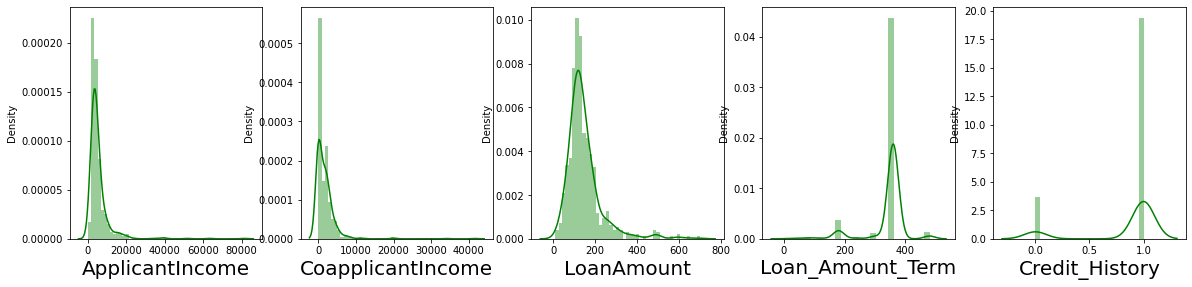

In [8]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in df.drop(columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 
                            'Loan_Status'], axis = 1):
    if plot_number <=35:
        plt.subplot(7,5,plot_number)
        sns.distplot(df[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

Upon analyzing above graphs, we can predict there might be skewness in few columns as those columns are not normally distributed


ApplicantIncome, CoapplicantIncome column data will have skewness

LoanAmount might exhibit skewness since it is distributed on right side

In [9]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

As predicted, ApplicantIncome, CoapplicantIncome Columns data are skewed, i.e out of -0.50 to +0.50 Range 

However, Skewness is listed even in columns LoanAmount, Loan_Amount_Term and Credit_History. These might be due to the Null Values.

In [10]:
print('Percentage of Null Values in Gender Column is %.2f%%' %((df['Gender'].isnull().sum()/df.shape[0])*100))

Percentage of Null Values in Gender Column is 2.12%


There are around 2.12% of missing values/ Null Values in Gender Column. 

In [11]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

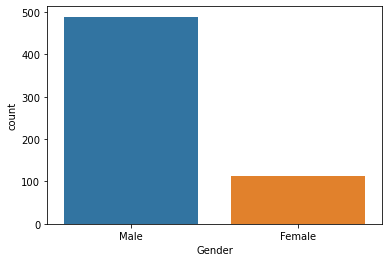

In [12]:
sns.countplot(df['Gender'])

Majority of the people applying for loan are Male

In [13]:
print('Percentage of Null Values in Married Column is %.2f%%' %((df['Married'].isnull().sum()/df.shape[0])*100))

Percentage of Null Values in Married Column is 0.49%


In [14]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

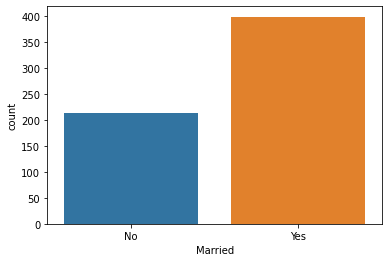

In [15]:
sns.countplot(df['Married'])

Most of people applying for loan are Married

In [16]:
print('Percentage of Null Values in Dependents Column is %.2f%%' %((df['Dependents'].isnull().sum()/df.shape[0])*100))

Percentage of Null Values in Dependents Column is 2.44%


In [17]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

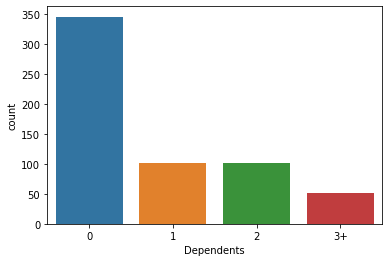

In [18]:
sns.countplot(df['Dependents'])

Majority of the people are without dependents followed by 1/2 dependents apply for loan. People with 3 dependents dont apply much

In [19]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

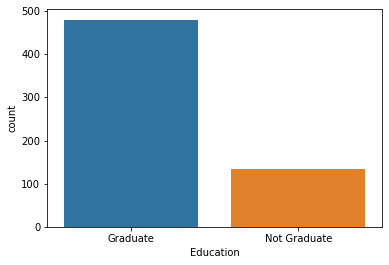

In [20]:
sns.countplot(df['Education'])

Majority of the people applying for loan are Graduates

In [21]:
print('Percentage of Null Values in Self Employed Column is %.2f%%' %((df['Self_Employed'].isnull().sum()/df.shape[0])*100))

Percentage of Null Values in Self Employed Column is 5.21%


In [22]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

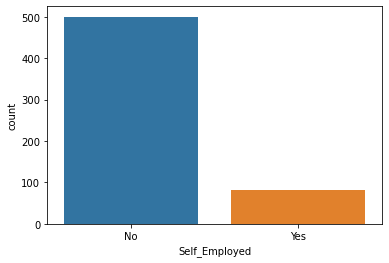

In [23]:
sns.countplot(df['Self_Employed'])

Majority of the people who are applying for loan are not Self Employed. We can observe that Self Employed people doesnt avail loans much

In [24]:
print('Percentage of Null Values in Credit History Column is %.2f%%' %((df['Credit_History'].isnull().sum()/df.shape[0])*100))

Percentage of Null Values in Credit History Column is 8.14%


In [25]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

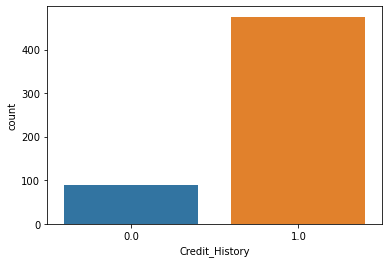

In [26]:
sns.countplot(df['Credit_History'])

Most of the people with credit history apply for loan

In [27]:
print('Percentage of Null Values in Loan Amount Column is %.2f%%' %((df['LoanAmount'].isnull().sum()/df.shape[0])*100))

Percentage of Null Values in Loan Amount Column is 3.58%


In [28]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

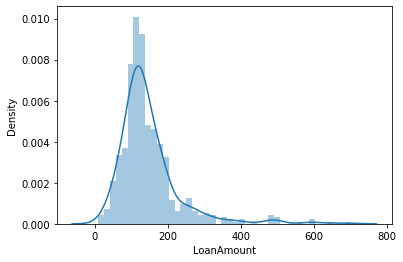

In [29]:
sns.distplot(df['LoanAmount'])

Most Frequently availed Loan amount is 120.0 followed by 110.0

In [30]:
print('Percentage of Null Values in Loan Amount Term Column is %.2f%%' %((df['Loan_Amount_Term'].isnull().sum()/df.shape[0])*100))

Percentage of Null Values in Loan Amount Term Column is 2.28%


In [31]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

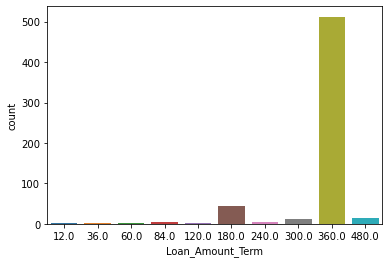

In [32]:
sns.countplot(df['Loan_Amount_Term'])

Most of the Loan requirement is for 360.0 Term and followed by 180.0; 12.0 Term is the least preferred term when applying for loan

### Analyzing the relationship between independent variable and dependent Variable

<AxesSubplot:xlabel='Gender'>

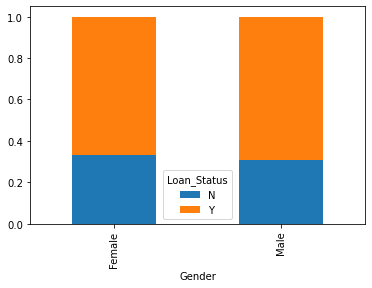

In [33]:
Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

From above plot, we can that Gender doesnt have much correlation with Loan_Status. So we can drop this column at later stage if required

<AxesSubplot:xlabel='Married'>

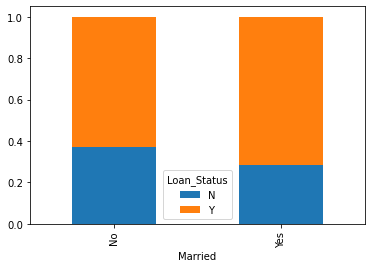

In [34]:
Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Married people have higher loan status approval not married people

<AxesSubplot:xlabel='Education'>

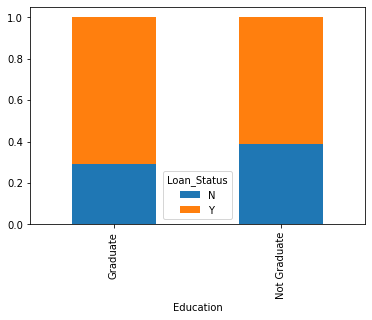

In [35]:
Education = pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Graduates have higher loan status approval than Non Graduate people

<AxesSubplot:xlabel='Self_Employed'>

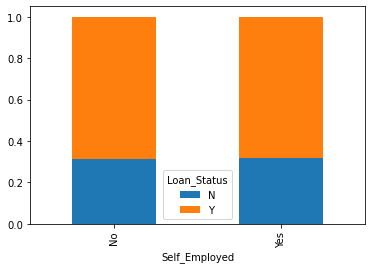

In [36]:
Self_Employed = pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Self Employed Column data doesnt affect much the Loan Status. So we can drop this column too if required at later stages

<AxesSubplot:xlabel='Credit_History'>

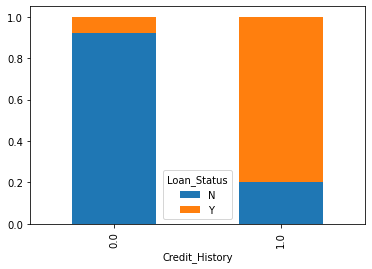

In [37]:
Credit_History = pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

People with Credit History have higher loan approval and it is the most correlated column data so far.

In [38]:
df=df.drop('Loan_ID',axis=1)

Dropping the Loan_ID Column as discussed in above Observation Notes

### Resolving Null Values

We have observed that Null values are in reasonable percentage and needs to be treated

In [39]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

Updating the Null Values in Categorical Columns with Mode

In [41]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

Updating the Null Values in Continous Columns with Median

In [42]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Null Values are resolved in the dataset

### Encoding the Categorical Data in Dataset using LabelEncoder

In [43]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [44]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


We can observe that all the columns are now having numerical Data Type

In [45]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


Analyzing the changes in dataset after encoding. All values are numericals now.

### Checking Correlation between each columns data

In [47]:
corr_mat=df.corr()
corr_mat

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


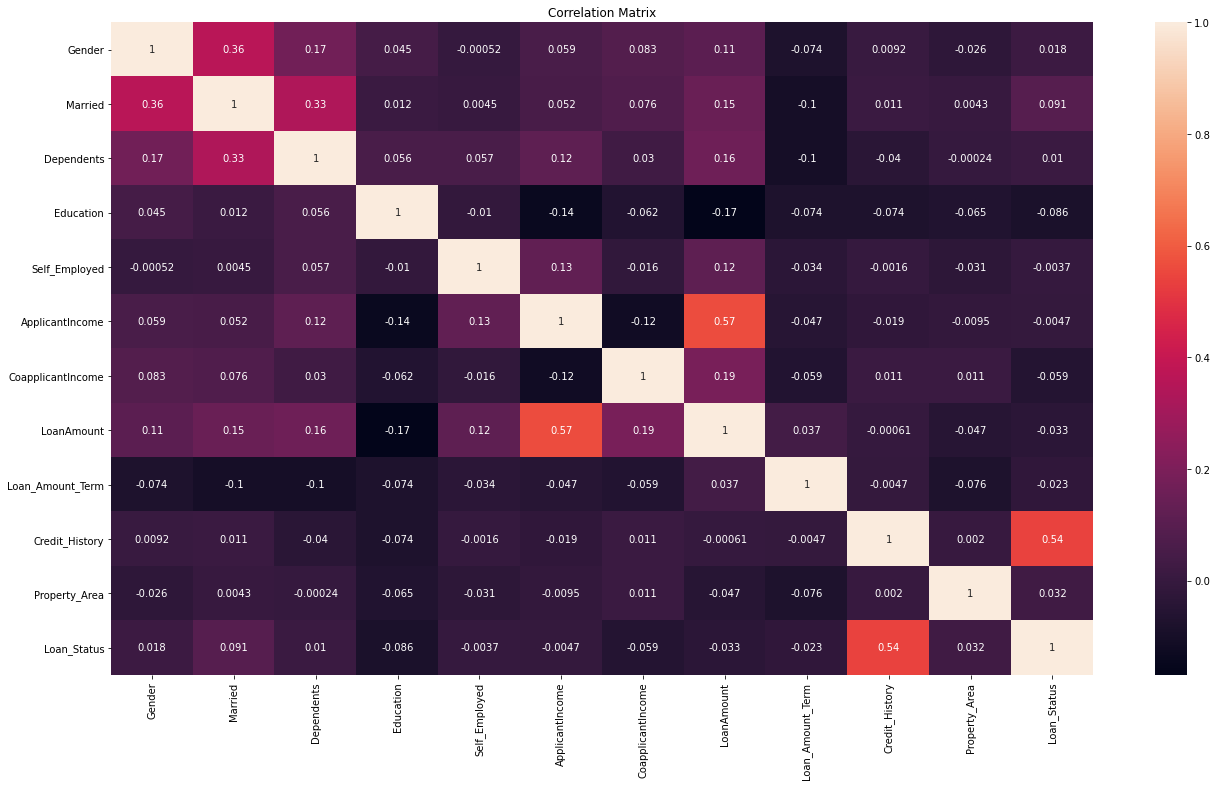

In [48]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:>

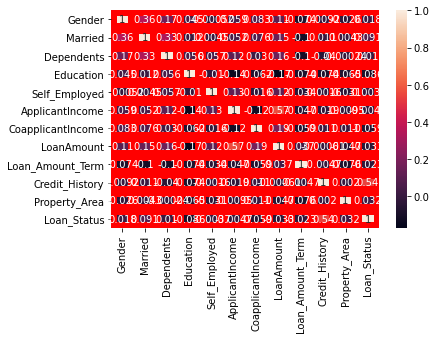

In [49]:
sns.heatmap(corr_mat,annot=True,linewidths=10,linecolor='r')

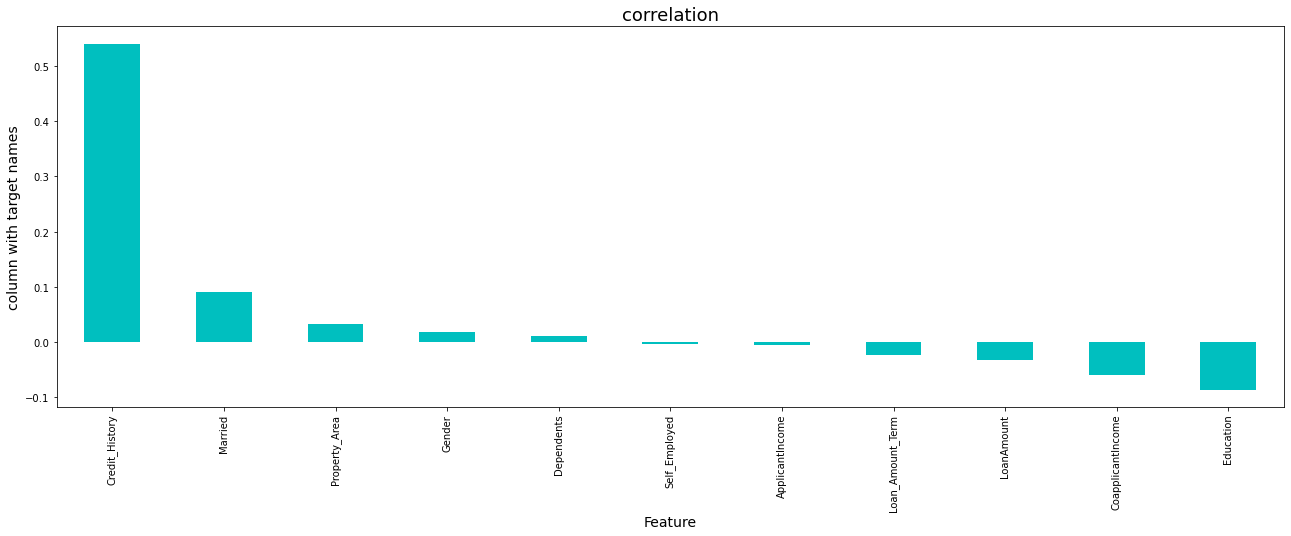

In [50]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [51]:
corr_mat["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

Using Heatmap, Correlation Matrix we can conclude that prediction done earlier is almost true.


1. Credit_History is the positively correlated Column with Loan_Status Column data and rest of the columns data are not that much related with the Target Variable "Loan_Status".


2. Self_Employed is the least correlated column followed by ApplicantIncome. We can drop these columns if required at later stages for better Model Prediction

### Checking for Outliers through boxplots and analyzing each column Outliers

In [52]:
x = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']
x_outlier=x.copy()
x_outlier

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


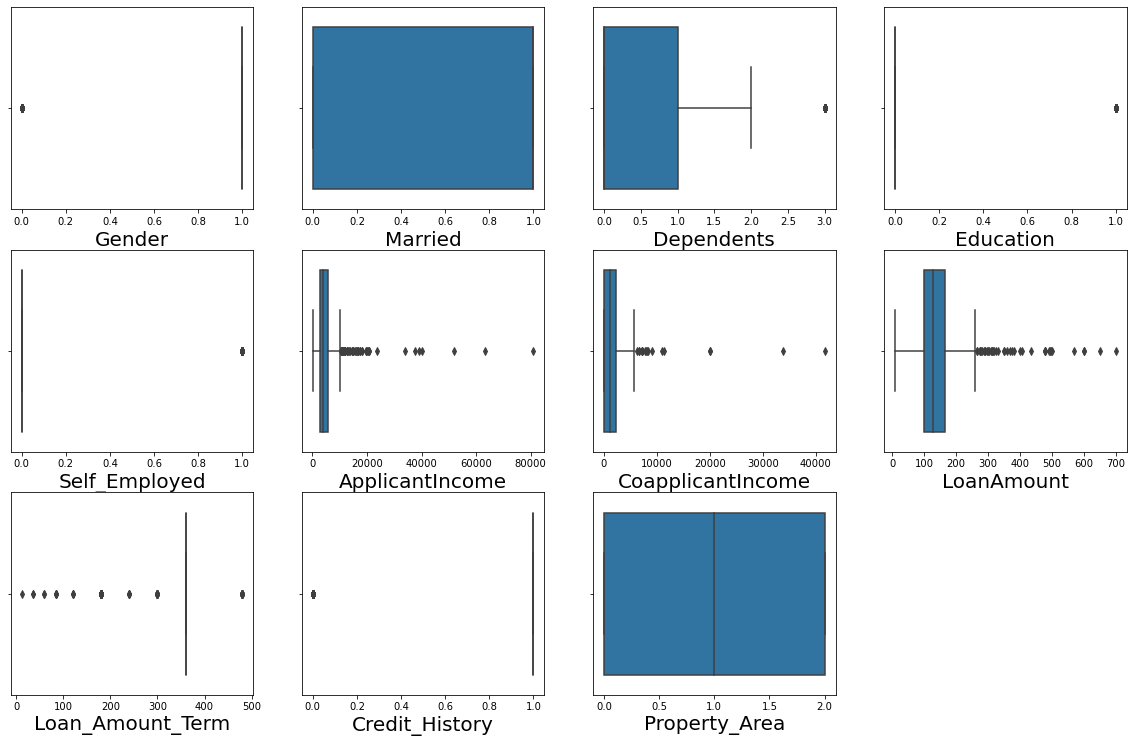

In [53]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x_outlier:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x_outlier[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

From above plots, we can confirm that there are outliers in ApplicantIncome, CoapplicantIncome, LoanAmount Column Data

### Outliers Removal

#### Using ZScore Method

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(x_outlier[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]))
x_zscore=x_outlier[(z<3).all(axis=1)]

##### Obtaining Data Set Shape after Outliers removed using zscore method

In [55]:
x_zscore.shape

(577, 11)

##### Dataset Shape before Outliers removal

In [56]:
x_outlier.shape

(614, 11)

In [57]:
zscore_data_loss=((614-577)/614)*100
zscore_data_loss

6.026058631921824

Upon analyzing, found 6.02% of Data loss is occured when ZScore Method is used for Outliers removal for this Data set. which is within acceptable range.

#### Analyzing Outliers through Boxplots after using Zscore

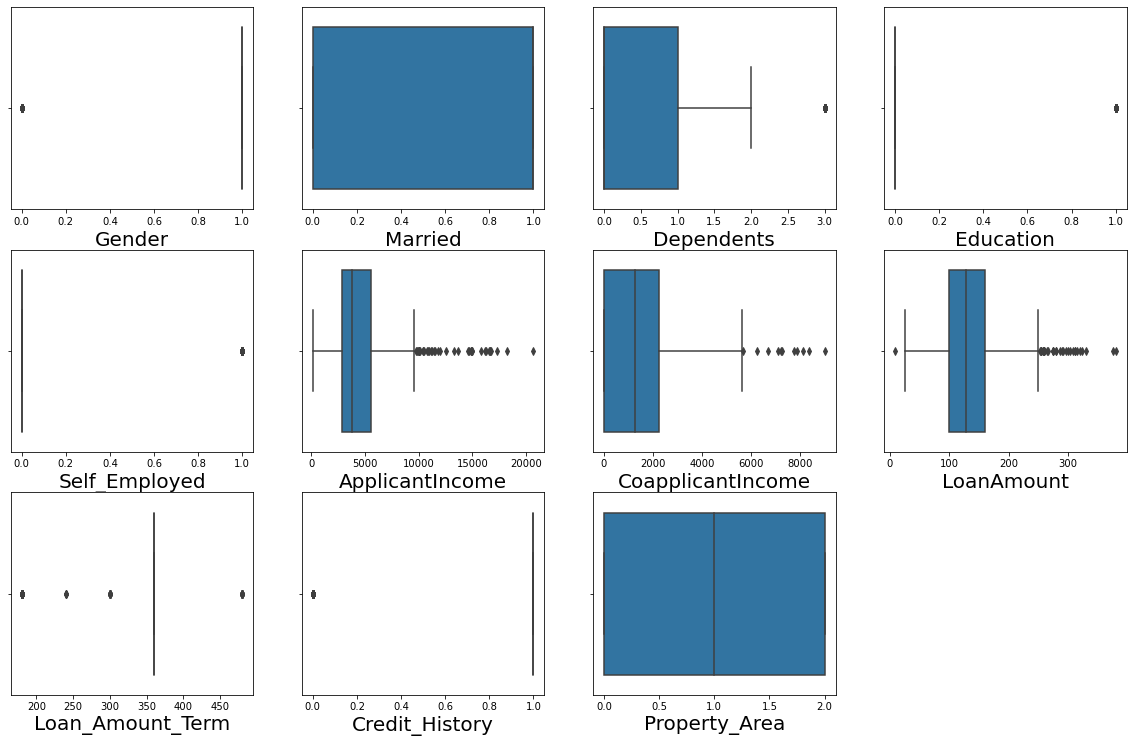

In [58]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x_zscore:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x_zscore[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

Upon reviewing above boxplots, we can observe significant amount of outliers is removed.

### Merging the Outlier Removed Feature Data Set with Earlier Original Data Set

In [59]:
drop_index = df.index.difference(x_zscore.index)
df.drop(drop_index,inplace = True)
df.reset_index(drop=True,inplace = True)
df.shape

(577, 12)

We can observe that Target variable is merged with outlier removed feature data set

### Skewness Analysis and Skewness Correction

#### 1. Using CBRT Technique

In [60]:
df_cbrt = df.copy()
df_cbrt

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
572,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
573,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
574,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
575,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


Copying the dataset to new name for CBRT Technique

In [61]:
x = df_cbrt.drop(columns=['Loan_Status'])
y = df_cbrt['Loan_Status']
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [62]:
x[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

Upon review, found all columns has skewness outside the allowed range of -0.5 to +0.5

In [63]:
x1=x[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

In [64]:
for index in x1.skew().index:
    if x1.skew().loc[index] >0.50:
        x1[index]=np.cbrt( x1[index])

In [65]:
x1.skew()

ApplicantIncome      0.845845
CoapplicantIncome   -0.038951
LoanAmount           0.054080
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

Upon reviewing above set after skewness correction from CBRT Technique, found below observations,


1. CoapplicantIncome, LoanAmount Skewness are reduced and within -0.50 to +0.50 range


2. ApplicantIncome is reduced but it is still outside the range of -0.50 to +0.50


3. Loan_Amount_Term, Credit_History is unchanged

# 2. Using Power Transformer Technique

In [66]:
df_powertransform = df.copy()
df_powertransform

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
572,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
573,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
574,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
575,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [67]:
x2 = df_powertransform.drop(columns=['Loan_Status'])
y2 = df_powertransform['Loan_Status']
y2.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [68]:
x2[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

Copying the dataset to new name for Power Transform Technique

In [69]:
x3=x2[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
x3_skew = power_transform(x3)
x3_skew = pd.DataFrame(x3_skew, columns=x3.columns)
x3_skew.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
dtype: float64

Upon reviewing above set after skewness correction from power transform Technique, We can conclude that power transform is best option to proceed forward since the skewness is corrected to an greater extent than CBRT Technique

#### Analyzing the distribution plots after skewness correction

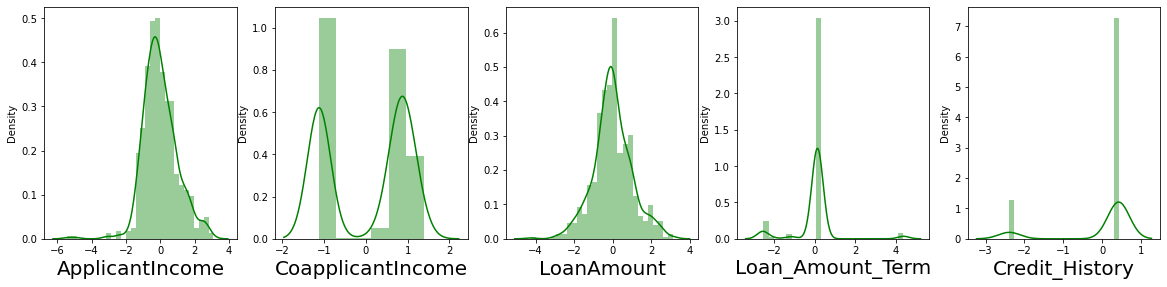

In [70]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in x3_skew:
    if plot_number <=31:
        plt.subplot(7,5,plot_number)
        sns.distplot(x3_skew[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

From these distribution plots, We can observe significant skewness is corrected and most of the columns data are normally distributed

### Merging the Skewness Corrected Feature Data Set with Earlier Original Data Set

In [71]:
drop_index = df.index.difference(x3_skew.index)
df.drop(drop_index,inplace = True)
df.reset_index(drop=True,inplace = True)
df.shape

(577, 12)

### Feature and Target Selection

In [72]:
x = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

### Applying Standard Scaler in order to check the Multicollinearity

In [73]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.47713685, -1.36251079, -0.72331271, ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.23085296,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.72331271, ...,  0.23085296,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.28801951, ...,  0.23085296,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.72331271, ...,  0.23085296,
        -2.38941464, -0.03952504]])

### Obtaining Multicollinearity using Variance Inflation Factor

In [74]:
vif = pd.DataFrame()

In [75]:
vif["Columns"] = x.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Columns,vif
0,Gender,1.205206
1,Married,1.341284
2,Dependents,1.174161
3,Education,1.072993
4,Self_Employed,1.072247
5,ApplicantIncome,1.625897
6,CoapplicantIncome,1.456240
7,LoanAmount,1.662005
8,Loan_Amount_Term,1.059945
9,Credit_History,1.009328


From above set, we can observe that most of the columns have same multicollinearity and VIF. So we couldnt get an idea through so we shall proceed with PCA

### Principle Component Analysis 

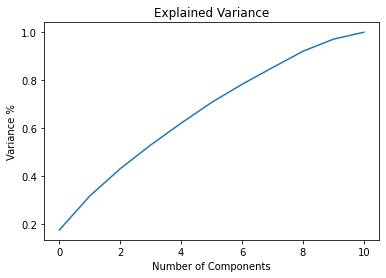

In [76]:
pca = PCA()
principle_components = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

We can conclude that for 95% variance, nearly 10 Principle components are contributing. So we can retain 10 components out of 11 components and build the model

In [77]:
pca_new = PCA(n_components=10)
new_components = pca_new.fit_transform(x_scaled)
x_principle=pd.DataFrame(new_components,columns=np.arange(10))
x_principle

,0,1,2,3,4,5,6,7,8,9
0,-1.106619,0.863973,0.103352,-1.237537,0.266841,0.073409,0.049291,-0.766622,-0.870631,-0.867963
1,0.668833,-0.296257,-0.584184,0.109577,-1.058247,-0.144736,0.543199,0.803503,-0.428810,0.281284
2,-0.429775,0.400758,1.117511,-0.695988,0.152906,0.669127,-2.712023,1.068987,-1.141260,0.577506
3,-0.046301,-1.629375,0.117294,-0.300032,0.084387,0.370459,-1.038892,-1.766338,-0.045991,0.595257
4,-0.987585,0.979584,0.050632,-1.215426,0.292863,0.059388,0.090238,-0.860889,-0.824191,-0.874245
...,...,...,...,...,...,...,...,...,...,...
572,-2.784094,0.466046,-0.582559,0.498277,-0.787284,0.322360,0.801820,1.096108,0.613553,0.225388
573,0.905491,-1.448705,2.447080,-0.329867,-0.836545,1.319215,2.058005,2.526618,0.240090,-0.580315
574,1.549337,1.432206,0.140801,-1.408973,0.123945,-0.630836,0.325996,-1.173640,0.014556,0.289691
575,1.285382,0.846446,0.906349,-1.594727,-0.315784,-0.973460,0.225644,-0.465249,0.207651,-0.063087


### Selecting KBest Features

#### Through KBest Features Technique, Features with least score can be obtained which will help us in deciding which columns to drop before proceeding to Model Building

In [78]:
best_features = SelectKBest(score_func = f_classif, k = 11)
best_fit = best_features.fit(x,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x.columns)

In [79]:
best_fit = best_features.fit(x,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x.columns)
columns.head()
featureScores = pd.concat([columns,scores],axis = 1)
featureScores.columns = ['Features', 'Scores']
print(featureScores.nlargest(15,'Scores'))

             Features      Scores
9      Credit_History  263.985861
3           Education    4.979459
1             Married    4.593676
6   CoapplicantIncome    1.167205
7          LoanAmount    0.523830
4       Self_Employed    0.404840
10      Property_Area    0.404285
8    Loan_Amount_Term    0.236848
2          Dependents    0.183728
0              Gender    0.174308
5     ApplicantIncome    0.014391


Upon reviewing Best Features Scores, found ApplicantIncome is  having the least and also it has the less correlationship. However, after analyzing the model accuracy with this dropped column, it was observed that similar accuaracy was obtained so proceeding with this column

In [80]:
x_best = x.copy()

In [81]:
x_best

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
572,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
573,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
574,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
575,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


### Resolving Class Imbalance using Oversampling (SMOTE Technique)

In [82]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x_best,y)

In [83]:
y_over.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

Class imbalance is resolved now.

### Handling class imbalance problem by Oversampling the minority class

In [84]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over = SM.fit_resample(x,y)

In [85]:
y_over.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [86]:
x = sc.fit_transform(x_over)
y = y_over.copy()

Applying Standard Scaler since scaling will help in better accuracy

## Model Building: Classification Problem

### Finding the Best Random State 

In [87]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = i)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8299595141700404 on random_state: 10


In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = maxRS)

In [89]:
#Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
accuracy_rfc = classification_report(y_test,rfc_pred)
confusion_matrix_rfc = confusion_matrix(y_test,rfc_pred)
cvs_rfc=cvs(rfc,x,y,cv=5).mean()
roc_rfc=roc_auc_score(y_test,rfc_pred)

#Logistic Regression Model

lrc= LogisticRegression(solver='liblinear')
lrc.fit(x_train,y_train)
lrc_pred = lrc.predict(x_test)
accuracy_lrc = classification_report(y_test,lrc_pred)
confusion_matrix_lrc = confusion_matrix(y_test,lrc_pred)
cvs_lrc=cvs(lrc,x,y,cv=5).mean()
roc_lrc=roc_auc_score(y_test,lrc_pred)

#Decision Tree Classifier Model

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
accuracy_dtc = classification_report(y_test,dtc_pred)
confusion_matrix_dtc = confusion_matrix(y_test,dtc_pred)
cvs_dtc=cvs(dtc,x,y,cv=5).mean()
roc_dtc=roc_auc_score(y_test,dtc_pred)

#SVC Model

sv= SVC()
sv.fit(x_train,y_train)
sv_pred = sv.predict(x_test)
accuracy_sv = classification_report(y_test,sv_pred)
confusion_matrix_sv = confusion_matrix(y_test,sv_pred)
cvs_sv=cvs(sv,x,y,cv=5).mean()
roc_sv=roc_auc_score(y_test,sv_pred)

#K Nearest Neighbors Classifier Model

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
accuracy_knn = classification_report(y_test,knn_pred)
confusion_matrix_knn = confusion_matrix(y_test,knn_pred)
cvs_knn=cvs(knn,x,y,cv=5).mean()
roc_knn=roc_auc_score(y_test,knn_pred)

### Random Forest Classifier 

In [90]:
confusion_matrix_rfc

array([[ 89,  27],
       [ 15, 116]], dtype=int64)

In [91]:
print(accuracy_rfc)

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       116
           1       0.81      0.89      0.85       131

    accuracy                           0.83       247
   macro avg       0.83      0.83      0.83       247
weighted avg       0.83      0.83      0.83       247



In [92]:
print(cvs_rfc)

0.8191981132075472


In [93]:
print(roc_rfc)

0.826368781258226


rfc_difference = 81-80.78 = 0.22

### Logistic Regression Model

In [94]:
confusion_matrix_lrc

array([[ 85,  31],
       [ 11, 120]], dtype=int64)

In [95]:
print(accuracy_lrc)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       116
           1       0.79      0.92      0.85       131

    accuracy                           0.83       247
   macro avg       0.84      0.82      0.83       247
weighted avg       0.84      0.83      0.83       247



In [96]:
print(cvs_lrc)

0.7727201257861636


In [97]:
print(roc_lrc)

0.8243945775204001


lrc_difference = 83-77.77 = 5.23

### Decision Tree Classifier Model

In [98]:
confusion_matrix_dtc

array([[94, 22],
       [34, 97]], dtype=int64)

In [99]:
print(accuracy_dtc)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       116
           1       0.82      0.74      0.78       131

    accuracy                           0.77       247
   macro avg       0.77      0.78      0.77       247
weighted avg       0.78      0.77      0.77       247



In [100]:
print(cvs_dtc)

0.7626808176100628


In [101]:
print(roc_dtc)

0.7754014214266912


dtc_difference = 77-75.37 = 1.63

### SVC Model

In [102]:
confusion_matrix_sv

array([[ 80,  36],
       [ 12, 119]], dtype=int64)

In [103]:
print(accuracy_sv)

              precision    recall  f1-score   support

           0       0.87      0.69      0.77       116
           1       0.77      0.91      0.83       131

    accuracy                           0.81       247
   macro avg       0.82      0.80      0.80       247
weighted avg       0.82      0.81      0.80       247



In [104]:
print(cvs_sv)

0.7689465408805033


In [105]:
print(roc_sv)

0.7990260594893392


sv_difference = 79-78.40 = 0.60

### K Nearest Neighbors Classifier Model

In [106]:
confusion_matrix_knn

array([[ 86,  30],
       [ 30, 101]], dtype=int64)

In [107]:
print(accuracy_knn)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       116
           1       0.77      0.77      0.77       131

    accuracy                           0.76       247
   macro avg       0.76      0.76      0.76       247
weighted avg       0.76      0.76      0.76       247



In [108]:
print(cvs_knn)

0.7324606918238994


In [109]:
print(roc_knn)

0.7561858383785206


knn_difference = 78-75.00 = 3

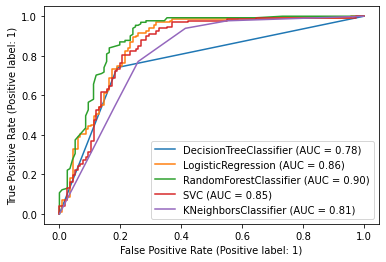

In [110]:
disp = plot_roc_curve(dtc,x_test,y_test)
mod = [lrc,rfc,sv,knn]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Upon reviewing the difference between Accuracy and cross validation score, Random Forest Classifier Model ranks with least difference and also Random Forest Classifier has best AUC so choosing Random Forest Classifier as Best Model

### Hyper Parameter Tuning Using Grid Search 

#### Defining the Parameters list for Random Forest Classifier

In [111]:
parameters = {'ccp_alpha': np.array([5,0.5,0.05,0.005,0.0005,1,0.1,0.01,0.001,0.0001,0]),
             'bootstrap': [True,False],
             'criterion': ["gini","entropy"],
             'max_depth': [300,200,150],
             'max_features': ["auto","sqrt","log2"]}

In [112]:
GridCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs = -1,verbose=2)

In [113]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'ccp_alpha': array([5.e+00, 5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 0.e+00]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [300, 200, 150],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=2)

In [114]:
GridCV.best_params_

{'bootstrap': False,
 'ccp_alpha': 0.0005,
 'criterion': 'gini',
 'max_depth': 150,
 'max_features': 'log2'}

Obtaining Best Parameters details for Best Model after training the parameters list given

### Training the Best Model with the Best Model Parameters

In [115]:
Best_model = RandomForestClassifier(ccp_alpha = 0.005, bootstrap = True, criterion = 'entropy', max_depth = 300, max_features = 'log2')
Best_model.fit(x_train,y_train)
pred_rfc_bm = Best_model.predict(x_test)
accuracy_rfc_bm = accuracy_score(y_test,pred_rfc_bm)
print(accuracy_rfc_bm*100)

85.02024291497976


In [116]:
confusion_matrix = confusion_matrix(y_test,pred_rfc_bm)
confusion_matrix

array([[ 87,  29],
       [  8, 123]], dtype=int64)

### Saving the Best Model

In [117]:
joblib.dump(Best_model,"Loan_Application_Status_Final_Best_Model_Random_Forest_Classifier.pkl")

['Loan_Application_Status_Final_Best_Model_Random_Forest_Classifier.pkl']

### Loading the Best Model

In [118]:
joblib.dump(Best_model,"Loan_Application_Status_Final_Best_Model_Random_Forest_Classifier.pkl")

['Loan_Application_Status_Final_Best_Model_Random_Forest_Classifier.pkl']

### Comparing Actual Value and Predicted Value

In [119]:
actual_data = np.array(y_test)
predicted_data = np.array(Best_model.predict(x_test))
df_comparision = pd.DataFrame({"Actual Value":actual_data, "Predicted Value":predicted_data}, index=range(len(actual_data)))
df_comparision

,Actual Value,Predicted Value
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
242,1,1
243,1,1
244,0,0
245,0,1


Upon review, found Predicted Value is 85.02% equivalent to Actual Values